## 🧠 1. Project Overview

This notebook is part of an end-to-end MLOps pipeline for predicting **customer churn** and **customer lifetime value (CLV)**.  
We will perform step-by-step **exploratory data analysis (EDA)** on a real-world dataset from a bank to understand its structure, target distribution, and modeling opportunities.

### Dataset Dictionary

A detailed description of each column in the dataset. This helps clarify the meaning, type, and role of each variable in the analysis.

| Column Name                  | Description                                                                                   |
|-----------------------------|-----------------------------------------------------------------------------------------------|
| `CLIENTNUM`                 | Unique identifier for the customer holding the account                                        |
| `Attrition_Flag`            | Indicates if the account is closed (`Attrited Customer`) or open (`Existing Customer`)        |
| `Customer_Age`              | Customer's age in years                                                                       |
| `Gender`                    | Customer gender: `M` for Male, `F` for Female                                                 |
| `Dependent_count`           | Number of dependents                                                                          |
| `Education_Level`           | Educational qualification (e.g., High School, Graduate, etc.)                                |
| `Marital_Status`            | Marital status: Married, Single, Divorced, Unknown                                            |
| `Income_Category`           | Annual income category (e.g., < $40K, $40K–60K, > $120K, Unknown)                             |
| `Card_Category`             | Type of credit card: Blue, Silver, Gold, Platinum                                             |
| `Months_on_book`            | Duration of the customer’s relationship with the bank (in months)                            |
| `Total_Relationship_Count`  | Total number of products the customer holds with the bank                                     |
| `Months_Inactive_12_mon`    | Number of months the customer was inactive in the past 12 months                             |
| `Contacts_Count_12_mon`     | Number of contacts made with the customer in the last 12 months                              |
| `Credit_Limit`              | Maximum credit limit for the customer’s credit card                                           |
| `Total_Revolving_Bal`       | Current balance that is carried month to month                                                |
| `Avg_Open_To_Buy`           | Average open-to-buy credit line over the last 12 months                                       |
| `Total_Amt_Chng_Q4_Q1`      | Ratio of transaction amount change from Q1 to Q4                                              |
| `Total_Trans_Amt`           | Total transaction amount in the past 12 months                                                |
| `Total_Trans_Ct`            | Total transaction count in the past 12 months                                                 |
| `Total_Ct_Chng_Q4_Q1`       | Ratio of transaction count change from Q1 to Q4                                               |
| `Avg_Utilization_Ratio`     | Average credit card utilization ratio                                                         |

## 📥 2. Load Dataset

We start by loading the dataset into a Pandas DataFrame and checking its shape.  
This helps confirm that the file is read correctly and gives us a sense of its size.

In [2]:
# 📥 Load dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv("../data/raw/BankChurners.csv")

# Display shape (rows, columns)
print(f"Dataset shape: {df.shape}")

# Show the first few rows
df.head()

Dataset shape: (10127, 21)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
df.Attrition_Flag.values

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Attrited Customer', 'Attrited Customer'],
      shape=(10127,), dtype=object)

## 🧾 3. Explore Column Names and First Rows

We examine the column names and display the first few rows of data.  
This helps understand the meaning and format of the variables before any cleaning or modeling.

In [3]:
def basic_eda_report(df, show_head=True, num_head=5):
    print(f"🔢 Dataset shape: {df.shape}\n")
    
    print("🧾 Column Names:")
    print(df.columns.tolist(), "\n")
    
    print("📊 Data Types and Nulls:")
    print(df.info(), "\n")
    
    print("🕳️ Null Values Count:")
    print(df.isnull().sum(), "\n")
    
    print("📈 Descriptive Statistics:")
    display(df.describe())
    
    if show_head:
        print(f"\n👀 First {num_head} Rows:")
        display(df.head(num_head))

In [4]:
basic_eda_report(df)

🔢 Dataset shape: (10127, 21)

🧾 Column Names:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'] 

📊 Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000



👀 First 5 Rows:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## 🏷 4. Create Binary Target Variable and Visualize Churn

We start by converting the `Attrition_Flag` column into a binary target variable named `churn`:
- `Attrited Customer` → 1 (churned)
- `Existing Customer` → 0 (retained)

Then, we visualize the distribution of churn vs. active customers to evaluate **class balance**.  
This helps us understand whether class imbalance may affect modeling.

**Original `Attrition_Flag` values:**
- "Attrited Customer" → churned  
- "Existing Customer" → retained

/tmp/ipykernel_12602/824243738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_col, palette="Set2", ax=ax)


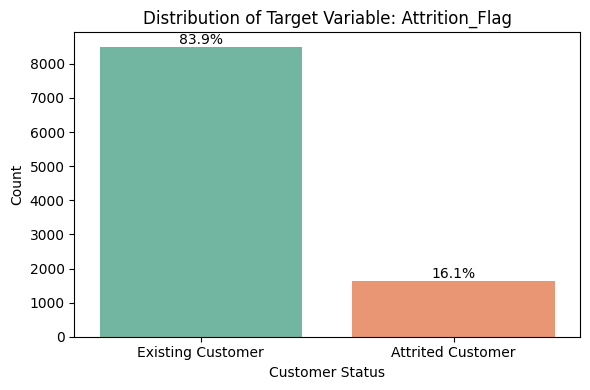

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_target_distribution(df, target_col='Attrition_Flag'):
    """
    Plots the distribution of the target variable.
    """
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(data=df, x=target_col, palette="Set2", ax=ax)
    plt.title("Distribution of Target Variable: Attrition_Flag")
    plt.xlabel("Customer Status")
    plt.ylabel("Count")
    
    # Display percentage labels on top of bars
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()


# Map 'Attrited Customer' → 1, 'Existing Customer' → 0
df['churn'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

# Run the function
plot_target_distribution(df)

## 🧼 5. Clean and Drop Irrelevant Columns

We identify and remove columns that won't contribute meaningfully to our models:  
- Unique IDs like `CLIENTNUM`  

In [7]:
## 🧹 5. Clean and Drop Irrelevant Columns

# Drop irrelevant columns
cols_to_drop = ['CLIENTNUM']
df.drop(columns=cols_to_drop, inplace=True)

print(f"✅ Dropped columns: {cols_to_drop}")
print(f"🔢 New shape: {df.shape}")

✅ Dropped columns: ['CLIENTNUM']
🔢 New shape: (10127, 20)


## 📈 6. Analyze Feature Distributions

We visualize the distribution of key numeric features such as:  
- `Customer_Age`  
- `Credit_Limit`  
- `Total_Trans_Amt`

This helps us understand their ranges, skewness, and possible outliers.

## 📈 6.a Analyze Numeric Feature Distributions

We explore the distribution of key numeric features using histograms and KDE plots to gain insights into:

- **Feature ranges and central tendencies**  
- **Skewness or long tails**  
- **Potential outliers**

**Features to explore:**
- `Customer_Age`  
- `Credit_Limit`  
- `Total_Trans_Amt`  
- `Total_Revolving_Bal`  
- `Avg_Utilization_Ratio`

Understanding these helps us decide on normalization, outlier treatment, or feature transformation.

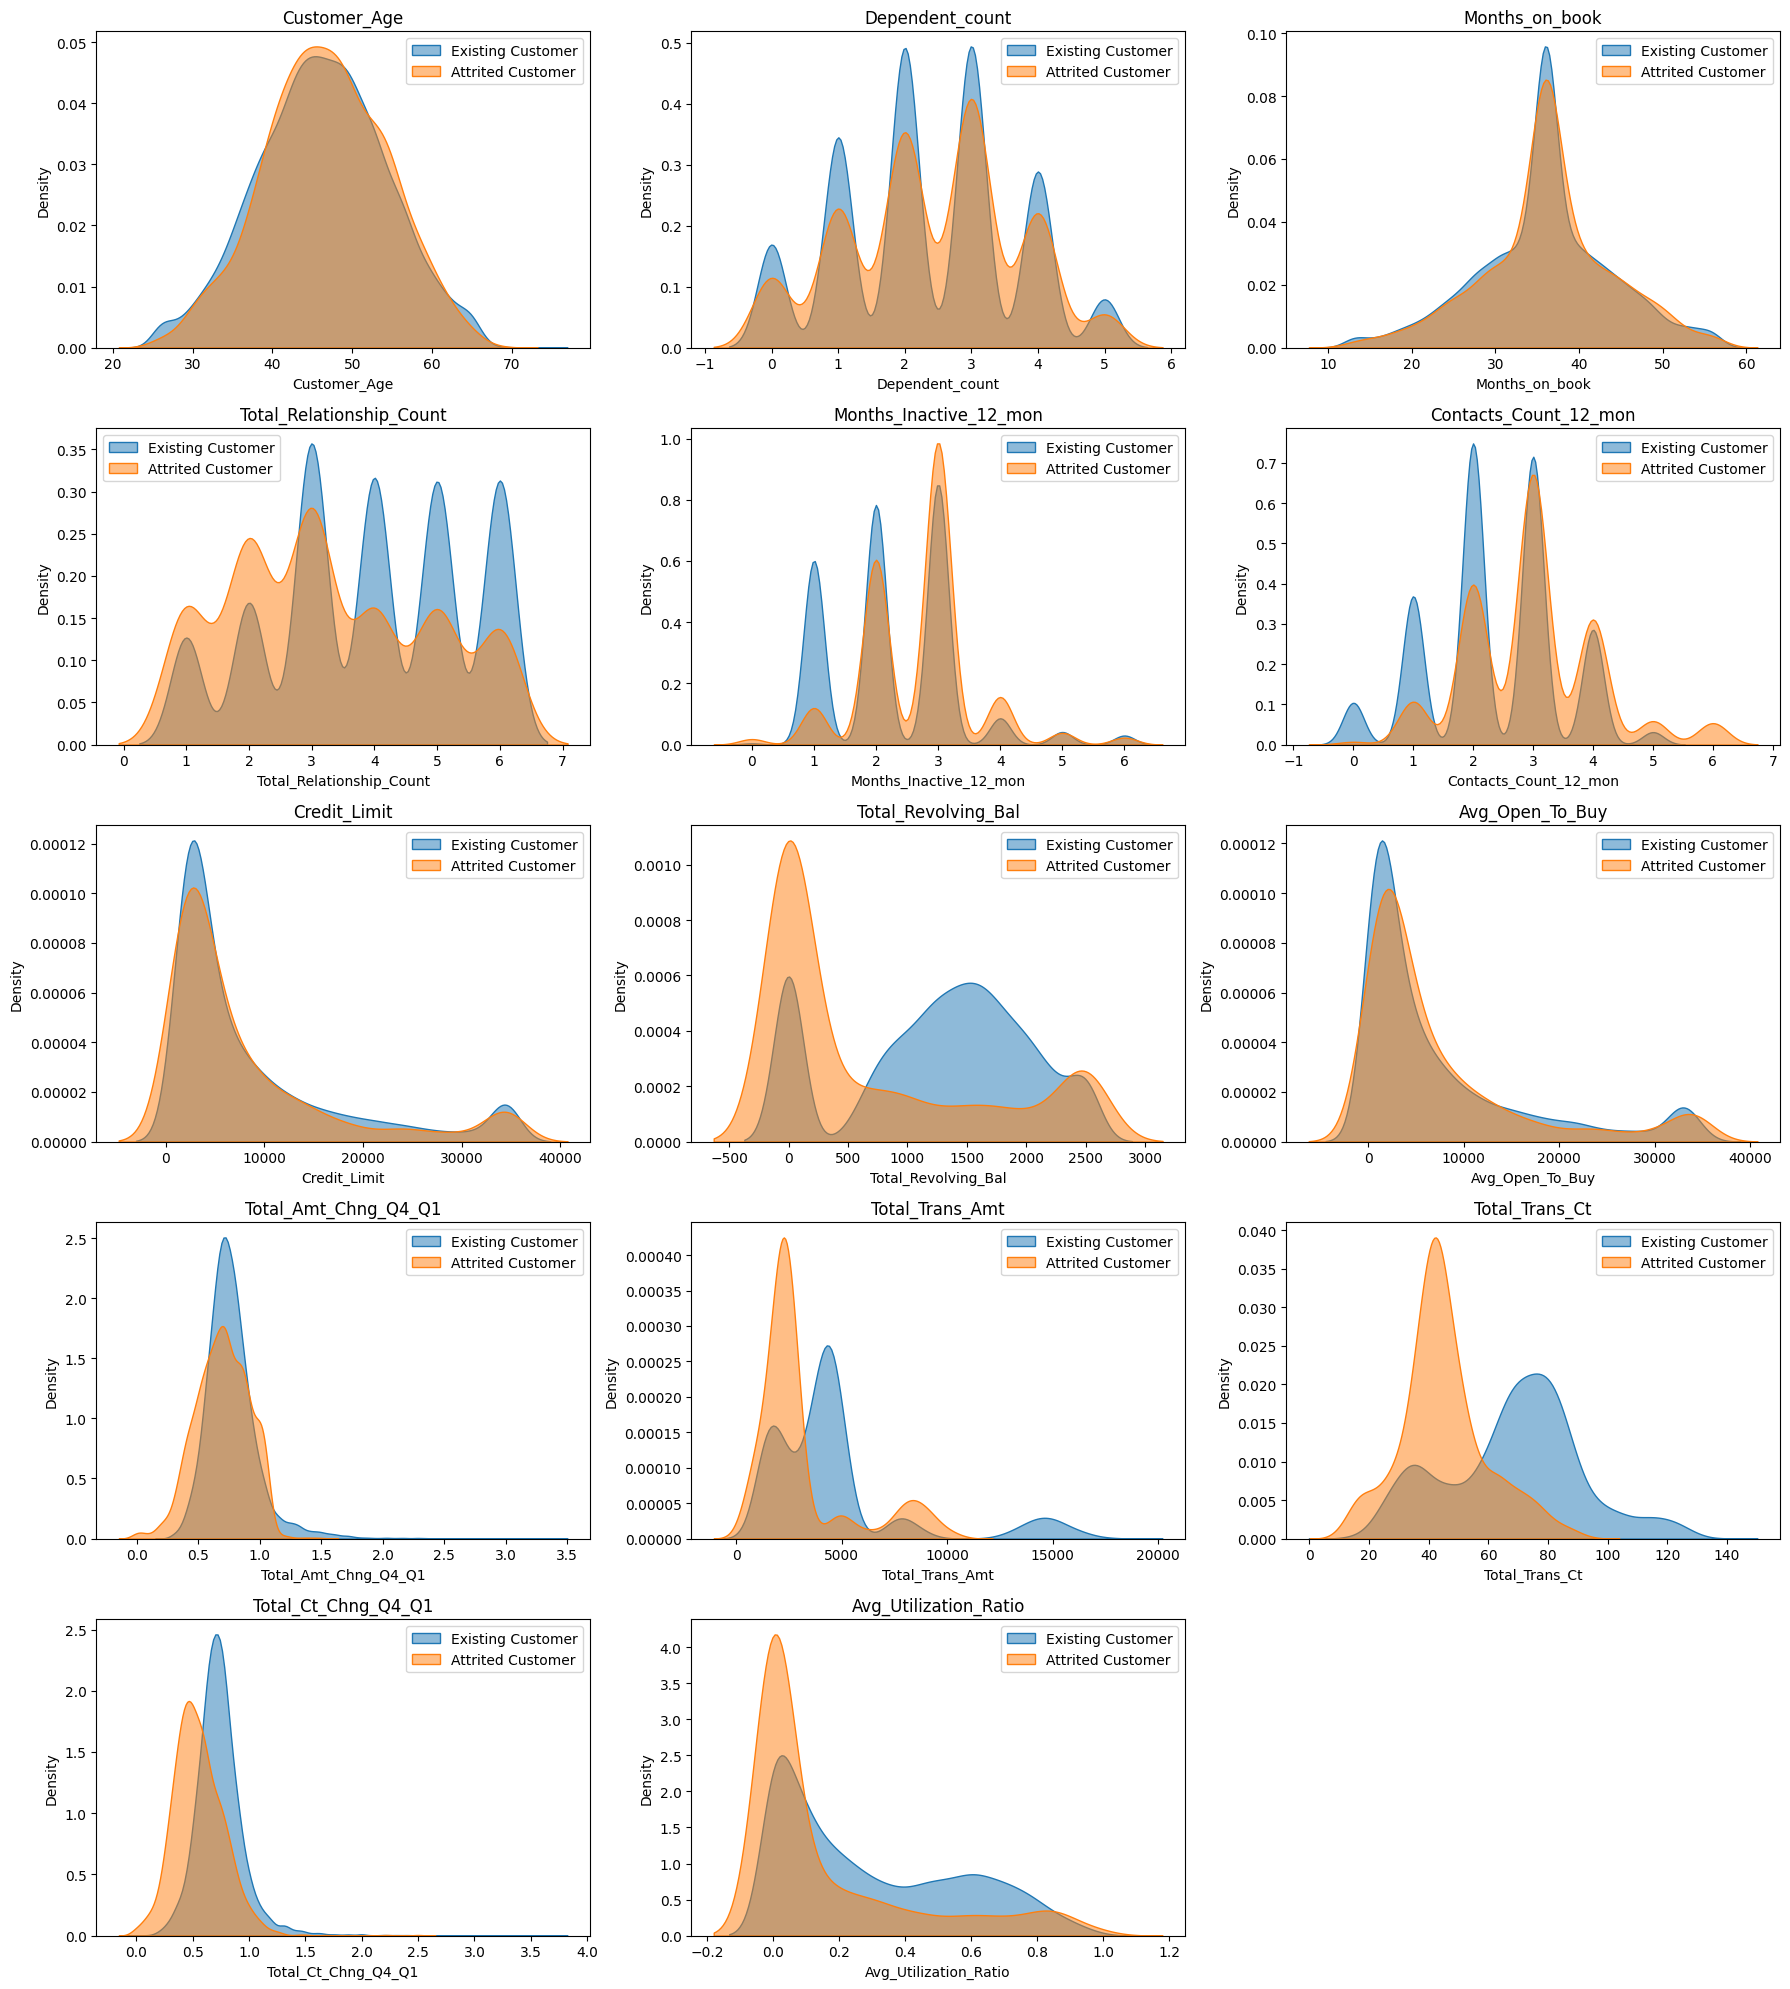

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select numerical columns only (excluding CLIENTNUM)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['churn']).columns

# 2. Set up plot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# 3. Plot distributions split by churn
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df[df['churn'] == 0], x=col, label='Existing Customer', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['churn'] == 1], x=col, label='Attrited Customer', fill=True, alpha=0.5)
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_12602/2475511589.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


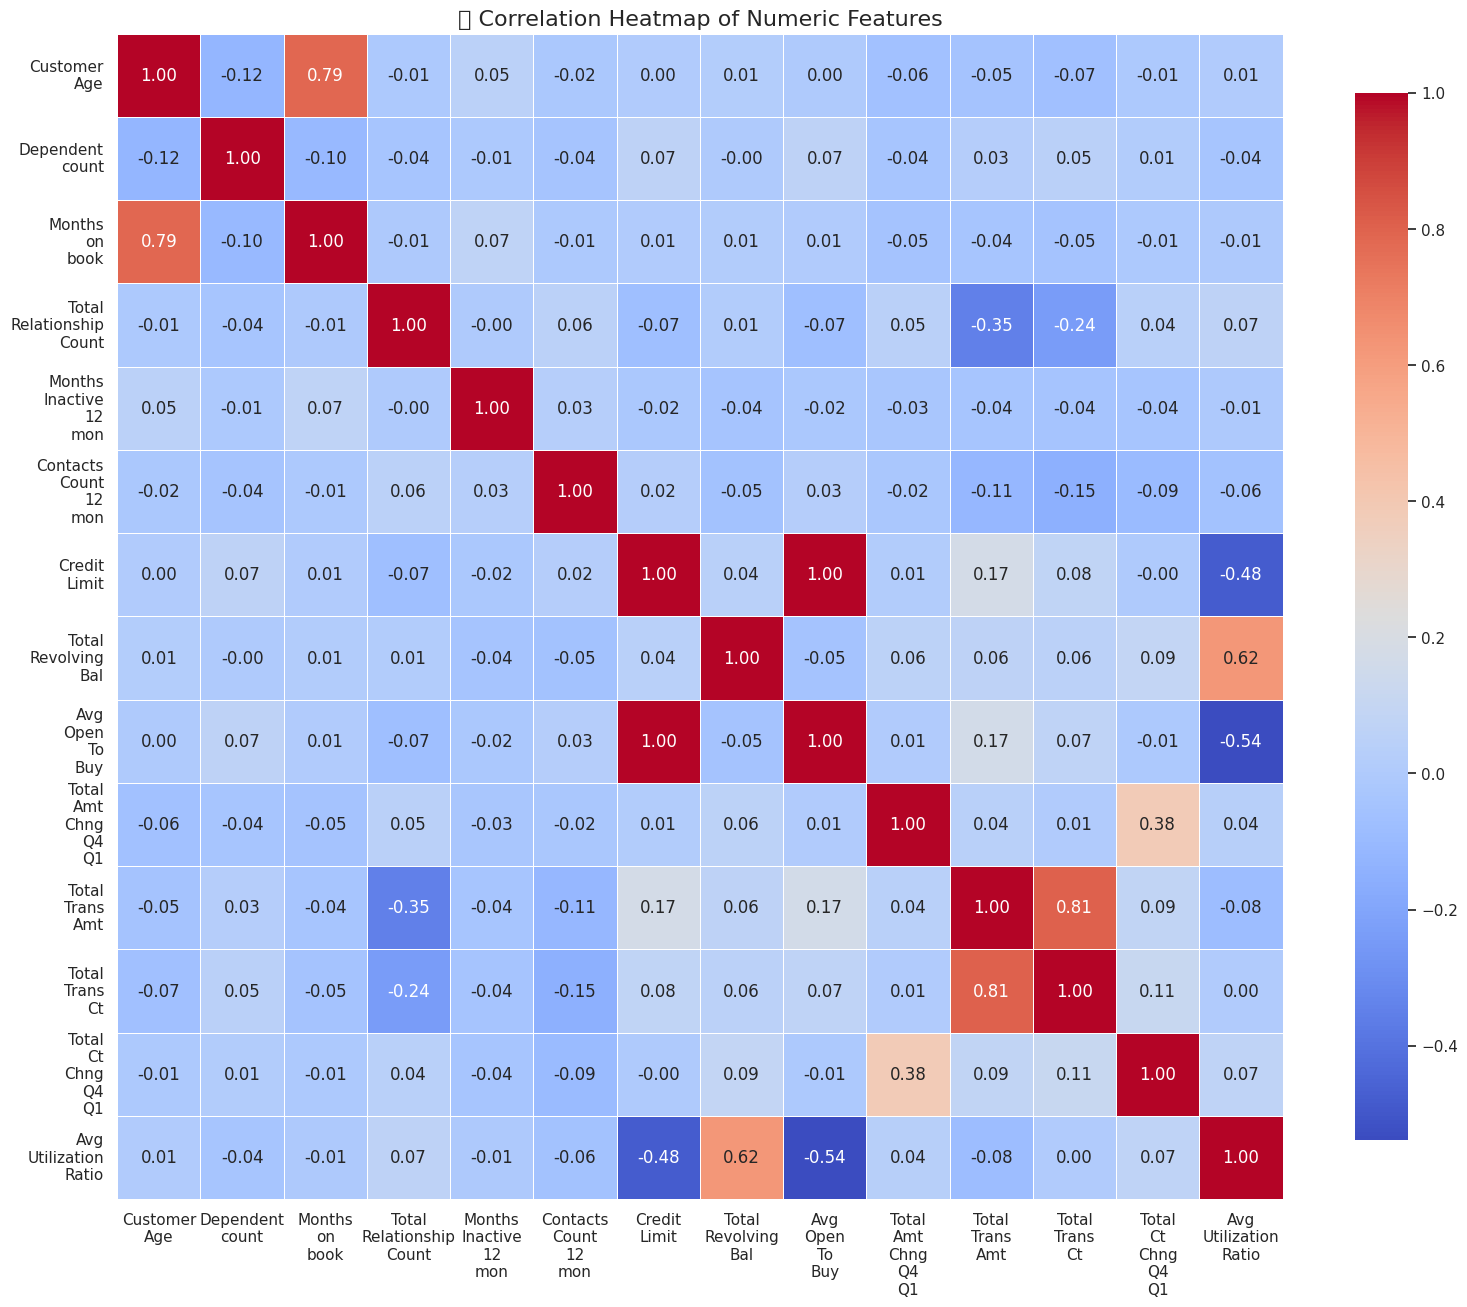

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding CLIENTNUM and churn)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['churn']).columns

# Compute correlation matrix
corr = df[numerical_cols].corr()

# Set up the plot
plt.figure(figsize=(16, 14))
sns.set(style='white')

# Create the heatmap with better label formatting
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    xticklabels=[col.replace('_', '\n') for col in corr.columns],  # multi-line
    yticklabels=[col.replace('_', '\n') for col in corr.index]
)

plt.title("📊 Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=0, ha='center')  # Better alignment
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 📊 6.b Analyze Categorical Feature Distributions

We explore the frequency of categories for key categorical features using bar plots.  
This helps us understand:

- **Class imbalance**  
- **Rare categories**  
- **Data entry issues like `Unknown`**

**Features to explore:**
- `Gender`  
- `Education_Level`  
- `Marital_Status`  
- `Income_Category`  
- `Card_Category`

These insights will guide our encoding strategy for modeling.

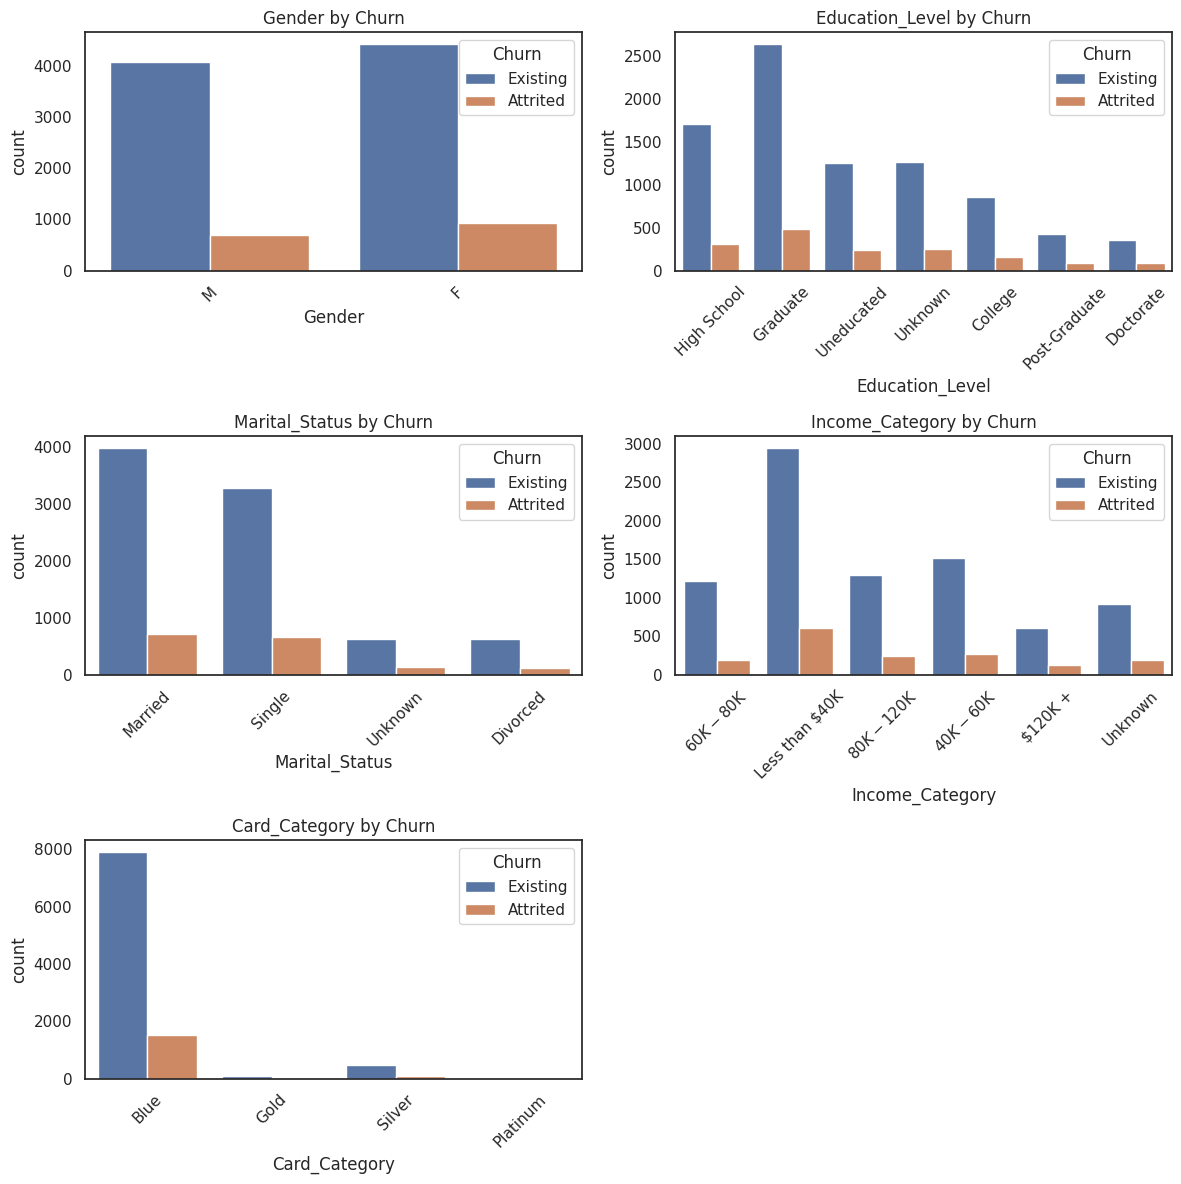

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns to explore
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Set up plot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Plot bar plots for each categorical feature
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f'{col} by Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['Existing', 'Attrited'])

plt.tight_layout()
plt.show()

## ✅ Step 7: Final Feature Selection

In this step, we finalize the set of features to use for modeling. This involves:

- ✅ **Dropping** irrelevant or uninformative columns  
- ✅ **Keeping** meaningful numeric features based on distribution and correlation analysis  
- ✅ **Encoding** all remaining categorical features using one-hot encoding (suitable due to low cardinality)

---

### 📌 Features to Drop:
- `CLIENTNUM`
- `Avg_Open_To_Buy` *(identified as uninformative based on distribution plots)*

---

### 🔢 Numerical Features to Keep:
- `Customer_Age`  
- `Dependent_count`  
- `Months_on_book`  
- `Total_Relationship_Count`  
- `Months_Inactive_12_mon`  
- `Contacts_Count_12_mon`  
- `Credit_Limit`  
- `Total_Revolving_Bal`  
- `Total_Trans_Amt`  
- `Total_Trans_Ct`  
- `Total_Amt_Chng_Q4_Q1`  
- `Total_Ct_Chng_Q4_Q1`  
- `Avg_Utilization_Ratio`

---

### 🔠 Categorical Features to Encode:
- `Gender`  
- `Education_Level`  
- `Marital_Status`  
- `Income_Category`  
- `Card_Category`

---

These features will form the input to our preprocessing pipeline before training the model.

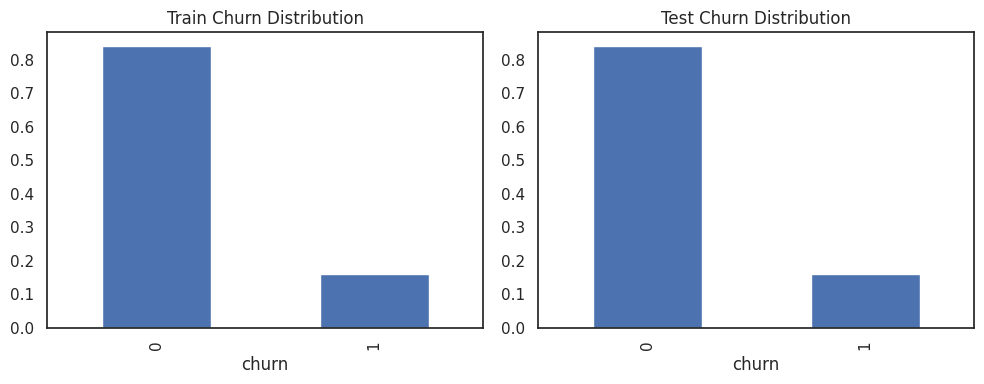

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Drop unused column
df_model = df.drop(columns=['Avg_Open_To_Buy'])

# Define features and target
numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

categorical_features = [
    'Gender', 'Education_Level', 'Marital_Status',
    'Income_Category', 'Card_Category'
]

features = numerical_features + categorical_features
target = 'churn'  # Replace with 'Attrition_Flag' if that's the column name

# Split data
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Merge features and labels back for saving
train_df = X_train.copy()
train_df[target] = y_train

test_df = X_test.copy()
test_df[target] = y_test

# Plot stratified distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
train_df[target].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Train Churn Distribution')
test_df[target].value_counts(normalize=True).plot(kind='bar', ax=ax[1], title='Test Churn Distribution')
plt.tight_layout()
plt.show()

# Save to CSV
import os

os.makedirs('data/processed', exist_ok=True)

train_df.to_csv('../data/processed/train.csv', index=False)
test_df.to_csv('../data/processed/test.csv', index=False)